In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd LR3/train

/content/gdrive/My Drive/LR3/train


In [0]:

import os
import tensorflow as tf
tf.enable_eager_execution()
tf.__version__

'1.14.0'

In [0]:
all_images_path=[]
all_images_label=[]
import pathlib
for dir in os.listdir():
  fold=pathlib.Path(dir)
  for item in fold.iterdir():
    all_images_path.append((item))
    all_images_label.append(str(dir))
all_images_path = [str(path) for path in all_images_path]
all_images_path_and_label=list(zip(all_images_path,all_images_label))
import random
random.shuffle(all_images_path_and_label)
all_images_path,all_images_label=zip(*(all_images_path_and_label))

In [0]:
cd train

/content/gdrive/My Drive/LR3/train


Storing all the image paths 

In [0]:
label=[]
for item in all_images_label:
  label.append(label_map[str(item)])

In [0]:
label

['czech_republic',
 'south_korea',
 'israel',
 'indonesia',
 'spain',
 'malaysia',
 'hungary',
 'singapore',
 'china',
 'chile',
 'norway',
 'india',
 'taiwan',
 'united_kingdom',
 'poland',
 'new_zealand',
 'mexico',
 'switzerland',
 'united_kingdom',
 'usa',
 'denmark',
 'india',
 'philippines',
 'spain',
 'japan',
 'australia',
 'south_africa',
 'pakistan',
 'czech_republic',
 'indonesia',
 'norway',
 'new_zealand',
 'brazil',
 'canada',
 'indonesia',
 'spain',
 'czech_republic',
 'russia',
 'russia',
 'brazil',
 'poland',
 'turkey',
 'chile',
 'spain',
 'united_kingdom',
 'united_kingdom',
 'czech_republic',
 'south_africa',
 'china',
 'poland',
 'russia',
 'russia',
 'new_zealand',
 'norway',
 'indonesia',
 'philippines',
 'south_africa',
 'brazil',
 'philippines',
 'turkey',
 'united_kingdom',
 'thailand',
 'united_kingdom',
 'canada',
 'taiwan',
 'south_korea',
 'hungary',
 'turkey',
 'chile',
 'thailand',
 'mexico',
 'thailand',
 'united_kingdom',
 'china',
 'japan',
 'switzerl

In [0]:
import numpy as np
label=np.array(label)

In [0]:
len(np.unique(label))

32

In [0]:
a=np.unique(label)

In [0]:
b=[]
i=0
for item in a:
  b.append(i)
  i+=1

In [0]:
dicta={}
dictb={}
for i in range(0,32):
  dicta[a[i]]=b[i]
  dictb[b[i]]=a[i]

In [0]:
dictb

{0: 'australia',
 1: 'brazil',
 2: 'canada',
 3: 'chile',
 4: 'china',
 5: 'czech_republic',
 6: 'denmark',
 7: 'hong_kong',
 8: 'hungary',
 9: 'india',
 10: 'indonesia',
 11: 'israel',
 12: 'japan',
 13: 'malaysia',
 14: 'mexico',
 15: 'new_zealand',
 16: 'norway',
 17: 'pakistan',
 18: 'philippines',
 19: 'poland',
 20: 'russia',
 21: 'singapore',
 22: 'south_africa',
 23: 'south_korea',
 24: 'spain',
 25: 'sweden',
 26: 'switzerland',
 27: 'taiwan',
 28: 'thailand',
 29: 'turkey',
 30: 'united_kingdom',
 31: 'usa'}

In [0]:
YTrain=[]
for item in label:
  YTrain.append(dicta[item])

In [0]:
YTrain=np.array(YTrain)

In [0]:
y=np.array(YTrain)
n_values = np.max(y)+1
y_tr=np.eye(n_values)[y]

In [0]:
y_tr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
y_train=np.array(label_cat)

In [0]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
cd train

[Errno 2] No such file or directory: 'train'
/content/gdrive/My Drive/LR3/train


In [0]:
import numpy as np
import cv2
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
image_width = 224
image_height = 224
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 211

dataset= np.ndarray(shape=(len(all_images_path), image_height, image_width,channels),
                     dtype=np.float32)
i=0
for path in all_images_path:
  img=cv2.imread(path)
  res = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
  dataset[i]=res/255.
  i+=1
  if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
5250 images to array
5500 images to array
5750 images to array
6000 images to array
6250 images to array
6500 images to array
6750 images to array
7000 images to array
All images to array!


In [0]:
tdataset = np.ndarray(shape=(1055, image_height, image_width,channels),
                     dtype=np.float32)
i=0
for i in range(1,1056):
  img=cv2.imread(str(i)+".jpg")
  res = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
  tdataset[i-1]=res/255.
  if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

250 images to array
500 images to array
750 images to array
1000 images to array
All images to array!


In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [224, 224])
  image = (image-127.5)/255.0 
  return image

def load_and_preprocess_image(image_path):
  image=tf.read_file(image_path)
  return preprocess_image(image)


In [0]:
import numpy as np
aip=np.array(all_images_path)
path_ds=tf.data.Dataset.from_tensor_slices(aip)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_images_label, tf.int64))
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
BATCH_SIZE = 32
image_count=len(all_images_label)
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
image_batch, label_batch = next(iter(ds))

In [0]:
tf.disable_eager_execution()
vgg_model=tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
58892288/58889256 [==============================] - 1s 0us/step


In [0]:
layer_dict=dict([(layer.name, layer) for layer in vgg_model.layers])

In [0]:
layer_dict

{'block1_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f410b54af60>,
 'block1_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f414292a518>,
 'block1_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f4102bbccf8>,
 'block2_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f4102bdd7f0>,
 'block2_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f4102b8f208>,
 'block2_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f4102b351d0>,
 'block3_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f4102b35a20>,
 'block3_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f4102b3b588>,
 'block3_conv3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f4102b3be10>,
 'block3_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f4102ab7160>,
 'block4_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f4102ab7f28>,
 'block4_conv

In [0]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
import keras
model=keras
vgg_model.add(keras.layers.Flatten())
vgg_model.add(keras.layers.Dense(512,activation='relu'))
vgg_model.add(keras.layers.Dense(32,activation='softmax'))
for layer in vgg_model.layers[:7]:
    layer.trainable = False


AttributeError: ignored

In [0]:
rms=keras.optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy',
                     optimizer=rms,metrics=['accuracy'])


In [0]:
y=np.array(all_images_label)
n_values = np.max(y) 
y_tr=np.eye(n_values)[y-1]

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# train the network
H = model.fit_generator(datagen.flow(dataset, y_tr, batch_size=16), steps_per_epoch=(len(y_tr)/32),epochs=8)

Epoch 1/8


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


221/220 [==============================] - 33s 150ms/step - loss: 16.0041 - acc: 0.0071
Epoch 2/8
221/220 [==============================] - 34s 154ms/step - loss: 15.9813 - acc: 0.0085
Epoch 3/8
221/220 [==============================] - 35s 156ms/step - loss: 15.9722 - acc: 0.0090
Epoch 4/8
221/220 [==============================] - 34s 156ms/step - loss: 16.0087 - acc: 0.0068
Epoch 5/8
221/220 [==============================] - 34s 156ms/step - loss: 16.0041 - acc: 0.0071
Epoch 6/8
221/220 [==============================] - 34s 153ms/step - loss: 15.9859 - acc: 0.0082
Epoch 7/8
221/220 [==============================] - 34s 156ms/step - loss: 15.9813 - acc: 0.0085
Epoch 8/8
221/220 [==============================] - 34s 154ms/step - loss: 15.9996 - acc: 0.0074


dict_keys(['loss', 'acc'])


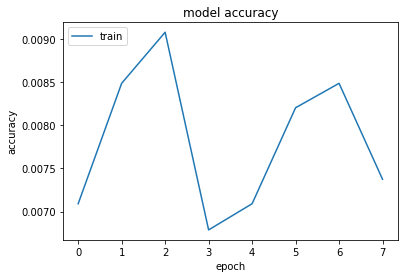

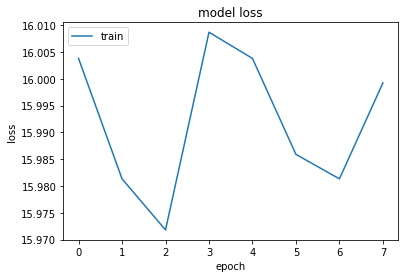

In [0]:
import matplotlib.pyplot as plt
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
model.compile(loss='categorical_crossentropy',
                     optimizer='Adam',metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# train the network
H = model.fit_generator(datagen.flow(dataset, y_tr, batch_size=16), steps_per_epoch=(len(y_tr)/32),epochs=8)

Epoch 1/8


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


221/220 [==============================] - 34s 156ms/step - loss: 16.0087 - acc: 0.0068
Epoch 2/8
221/220 [==============================] - 34s 155ms/step - loss: 15.9768 - acc: 0.0088
Epoch 3/8
221/220 [==============================] - 34s 156ms/step - loss: 15.9829 - acc: 0.0084
Epoch 4/8
221/220 [==============================] - 34s 155ms/step - loss: 15.9950 - acc: 0.0076
Epoch 5/8
221/220 [==============================] - 33s 150ms/step - loss: 15.9905 - acc: 0.0079
Epoch 6/8
221/220 [==============================] - 34s 155ms/step - loss: 15.9950 - acc: 0.0076
Epoch 7/8
221/220 [==============================] - 33s 151ms/step - loss: 15.9950 - acc: 0.0076
Epoch 8/8
221/220 [==============================] - 35s 156ms/step - loss: 15.9859 - acc: 0.0082


dict_keys(['loss', 'acc'])


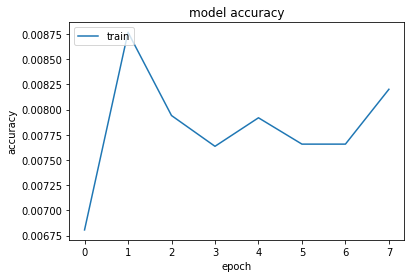

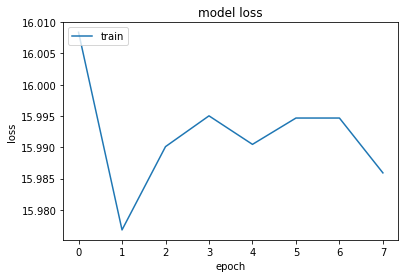

In [0]:
import matplotlib.pyplot as plt
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
import keras
x=layer_dict['block5_pool'].output
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(512,activation='relu')(x)
x=keras.layers.Dense(512,activation='relu')(x)
x=keras.layers.Dense(211,activation='softmax')(x)

from keras.models import Model
model=Model(input=vgg_model.input,output=x)
for layer in model.layers[:15]:
    layer.trainable = False
model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop',metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [0]:
model.compile(loss='categorical_crossentropy',
                     optimizer='Adam',metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# train the network
H = model.fit_generator(datagen.flow(dataset, y_tr, batch_size=16), steps_per_epoch=(len(y_tr)/32),epochs=8)

Epoch 1/8


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


221/220 [==============================] - 34s 155ms/step - loss: 5.4434 - acc: 0.0178
Epoch 2/8
221/220 [==============================] - 34s 153ms/step - loss: 4.7398 - acc: 0.0509
Epoch 3/8
221/220 [==============================] - 32s 147ms/step - loss: 4.0121 - acc: 0.1173
Epoch 4/8
221/220 [==============================] - 34s 152ms/step - loss: 3.6086 - acc: 0.1773
Epoch 5/8
221/220 [==============================] - 35s 157ms/step - loss: 3.2007 - acc: 0.2327
Epoch 6/8
221/220 [==============================] - 34s 154ms/step - loss: 3.0519 - acc: 0.2696
Epoch 7/8
221/220 [==============================] - 34s 154ms/step - loss: 2.7771 - acc: 0.3037
Epoch 8/8
221/220 [==============================] - 35s 157ms/step - loss: 2.6838 - acc: 0.3439


dict_keys(['loss', 'acc'])


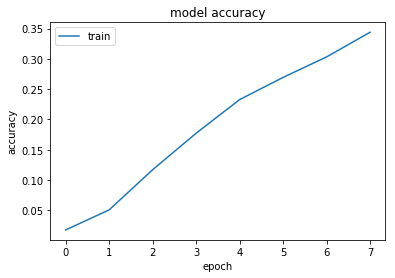

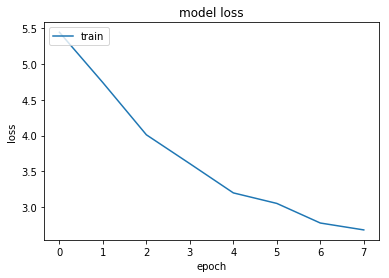

In [0]:
import matplotlib.pyplot as plt
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
H = model.fit_generator(datagen.flow(dataset, y_tr, batch_size=16), steps_per_epoch=(len(y_tr)/32),epochs=20)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


221/220 [==============================] - 35s 157ms/step - loss: 1.3039 - acc: 0.6290
Epoch 2/20
221/220 [==============================] - 35s 157ms/step - loss: 1.2721 - acc: 0.6462
Epoch 3/20
221/220 [==============================] - 35s 157ms/step - loss: 1.2610 - acc: 0.6355
Epoch 4/20
221/220 [==============================] - 35s 157ms/step - loss: 1.3727 - acc: 0.6213
Epoch 5/20
221/220 [==============================] - 34s 154ms/step - loss: 1.2394 - acc: 0.6460
Epoch 6/20
221/220 [==============================] - 34s 155ms/step - loss: 1.2337 - acc: 0.6417
Epoch 7/20
221/220 [==============================] - 34s 154ms/step - loss: 1.1813 - acc: 0.6562
Epoch 8/20
221/220 [==============================] - 34s 152ms/step - loss: 1.2602 - acc: 0.6420
Epoch 9/20
221/220 [==============================] - 34s 156ms/step - loss: 1.2202 - acc: 0.6547
Epoch 10/20
221/220 [==============================] - 35s 157ms/step - loss: 1.2154 - acc: 0.6441
Epoch 11/20
221/220 [=========

dict_keys(['loss', 'acc'])


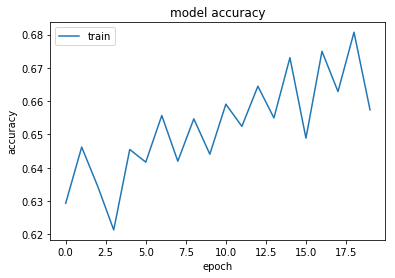

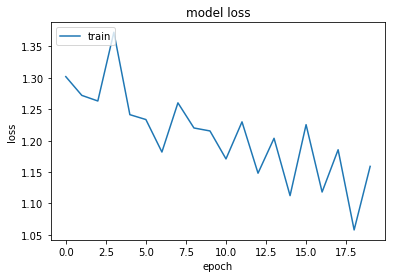

In [0]:
import matplotlib.pyplot as plt
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:

x=layer_dict['block5_pool'].output
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(2048,activation='relu')(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dense(211,activation='softmax')(x)

from keras.models import Model
model=Model(input=vgg_model.input,output=x)
for layer in model.layers[:15]:
    layer.trainable = False
model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop',metrics=['accuracy'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


TypeError: ignored

In [0]:
H = model.fit_generator(datagen.flow(dataset, y_tr, batch_size=32), steps_per_epoch=(len(y_tr)/32),epochs=10)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


221/220 [==============================] - 68s 309ms/step - loss: 0.7452 - acc: 0.7829
Epoch 2/10
221/220 [==============================] - 69s 313ms/step - loss: 0.7081 - acc: 0.7925
Epoch 3/10
221/220 [==============================] - 69s 314ms/step - loss: 0.6571 - acc: 0.8050
Epoch 4/10
200/220 [==========================>...] - ETA: 6s - loss: 0.6274 - acc: 0.8042

KeyboardInterrupt: ignored

In [0]:
y_train.shape

(7046, 32)

In [0]:
inp_shp=(224,224,3)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu",input_shape=inp_shp))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation="softmax"))

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 111, 111, 64)      256       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 52, 52, 128)      

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["accuracy"])


In [0]:
from keras

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
#history = model.fit_generator(datagen.flow(dataset, y_tr, batch_size=16), steps_per_epoch=(len(y_tr)/32),epochs=50)
history=model.fit(dataset,y_tr, batch_size=32, epochs=1,
          validation_split=0.2,  verbose=1, shuffle=True)

Train on 5636 samples, validate on 1410 samples
5636/5636 [==============================] - 75s 13ms/sample - loss: 0.0220 - acc: 0.9941 - val_loss: 0.5395 - val_acc: 0.8922


In [0]:
model.save('modelnew2.h5')

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
cd test

/content/gdrive/My Drive/LR3/test


In [0]:
model.save('model_new.h5')

In [0]:
from keras.models import load_model
model=tf.keras.models.load_model('model9.h5')

In [0]:
tf.disable_eager_execution()
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

#Loading the ResNet50 model with pre-trained ImageNet weights
model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
X_train_new = np.array([cv2.resize(dataset[i], (200, 200)) for i in range(0, len(dataset))]).astype('float32')

#Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model. 
resnet_train_input = preprocess_input(X_train_new)

#Creating bottleneck features for the training data
train_features = model.predict(resnet_train_input)

#Saving the bottleneck features


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
X_test_new = np.array([cv2.resize(tdataset[i], (200, 200)) for i in range(0, len(tdataset))]).astype('float32')
resnet_test_input = preprocess_input(X_test_new)

In [0]:
test_features=model.predict(resnet_test_input)

In [0]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model.add(Dropout(0.3))
model.add(Dense(32, activation='softmax'))
model.summary()
import keras
#adgrad=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, 
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                65568     
Total params: 65,568
Trainable params: 65,568
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(train_features, y_tr, batch_size=32, epochs=15,
          validation_split=0.1,  verbose=1, shuffle=True)

Train on 6341 samples, validate on 705 samples
Epoch 1/15
6341/6341 [==============================] - 2s 310us/step - loss: 0.2422 - acc: 0.9547 - val_loss: 0.5574 - val_acc: 0.8596
Epoch 2/15
6341/6341 [==============================] - 2s 306us/step - loss: 0.2355 - acc: 0.9571 - val_loss: 0.5605 - val_acc: 0.8610
Epoch 3/15
6341/6341 [==============================] - 2s 305us/step - loss: 0.2348 - acc: 0.9566 - val_loss: 0.5605 - val_acc: 0.8667
Epoch 4/15
6341/6341 [==============================] - 2s 304us/step - loss: 0.2366 - acc: 0.9554 - val_loss: 0.5571 - val_acc: 0.8652
Epoch 5/15
4256/6341 [===================>..........] - ETA: 0s - loss: 0.2360 - acc: 0.9549

KeyboardInterrupt: ignored

In [0]:
p=model.predict(tdataset)

In [0]:
p.shape

(1055, 32)

In [0]:
pre=[]
for i in range(0,1055):
  pre.append(np.argmax(p[i],axis=0))

In [0]:
p=np.array(p)

In [0]:
p

array([[1.1969159e-09, 1.2053325e-06, 4.0956610e-07, ..., 8.1055031e-11,
        1.9774245e-12, 1.6427043e-08],
       [2.6415536e-11, 1.9995487e-10, 2.5325926e-07, ..., 6.3900302e-10,
        1.0021882e-08, 4.1505100e-06],
       [1.3056765e-02, 3.5603822e-03, 1.1269092e-03, ..., 2.0628560e-02,
        1.5294114e-02, 7.2678011e-03],
       ...,
       [4.2928303e-07, 5.5269766e-06, 4.9302507e-06, ..., 4.2302737e-08,
        1.4384789e-09, 8.7931329e-07],
       [7.9892081e-04, 4.7041263e-04, 5.5141235e-03, ..., 9.3707070e-02,
        1.4524513e-02, 2.6260266e-01],
       [1.7261710e-12, 3.4650045e-15, 2.9805387e-11, ..., 2.3269099e-12,
        6.5528581e-16, 3.0961132e-12]], dtype=float32)

In [0]:
cd ..

/content/gdrive/My Drive/LR3


In [0]:
import json
with open('country.json','r') as f:
  label_map=json.load(f)

In [0]:
label_map

{'1': '1 Cent,Australian dollar,australia',
 '10': '5 Centavos,Brazilian Real,brazil',
 '100': '5 Won,Korean Won,south_korea',
 '101': '10 Won,Korean Won,south_korea',
 '102': '50 Won,Korean Won,south_korea',
 '103': '100 Won,Korean Won,south_korea',
 '104': '500 Won,Korean Won,south_korea',
 '105': '1 Sen,Malaysian Ringgit,malaysia',
 '106': '5 Sen,Malaysian Ringgit,malaysia',
 '107': '10 Sen,Malaysian Ringgit,malaysia',
 '108': '20 Sen,Malaysian Ringgit,malaysia',
 '109': '50 Sen,Malaysian Ringgit,malaysia',
 '11': '10 Centavos,Brazilian Real,brazil',
 '110': '5 Centavos,Mexican peso,mexico',
 '111': '10 Centavos,Mexican peso,mexico',
 '112': '20 Centavos,Mexican peso,mexico',
 '113': '50 Centavos,Mexican peso,mexico',
 '114': '1 Peso,Mexican peso,mexico',
 '115': '2 Pesos,Mexican peso,mexico',
 '116': '5 Pesos,Mexican peso,mexico',
 '117': '10 Pesos,Mexican peso,mexico',
 '118': '5 Cents,New Zealand dollar,new_zealand',
 '119': '10 Cents,New Zealand dollar,new_zealand',
 '12': '25 C

In [0]:
for value in label_map:
  s=label_map[value]
  l=[]
  l=s.split(',')
  label_map[value]=l[-1]
  

In [0]:
pg=[]
for item in pre:
  pg.append(dictb[item])

In [0]:
pg=np.array(pg)

In [0]:
cp=[]
for item in pre:
  cp.append(label_map[str(item)])

In [0]:
import pandas as pd

In [0]:
d=pd.DataFrame()
a=[]
for i in range(1,1056):
  a.append(i)

In [0]:
d['ID']=a

In [0]:
d['Country']=pg

In [0]:
d.to_csv('sub21.csv',index=False)

In [0]:
d

,ID,Country
0,1,thailand
1,2,mexico
2,3,switzerland
3,4,pakistan
4,5,india
5,6,brazil
6,7,malaysia
7,8,spain
8,9,israel
9,10,japan
